# data exploration:

Here I will explore both the train data and later examine the performance of the model produced by sentiment analysis. To start, I will examine character frequency as well as the word length of posts. I will examine the test and train seperately, and also examine these statisitics by class, to make sure the classes are relatively similar. 

Then I will run TF-IDF to compare the importance of words between postive and negative labeled data. 

Once I have finished exploring the train data, I will plot the performance of the model over each batch. I will plot various metrics, including binary accuracy, precision, recall, and AUC.

In [18]:
#imports needed for my data exploration
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [43]:
#Since I remove all this data immediately when I 
def pruneData(data, label):
    print(np.shape(data), np.shape(label))
    i = 0
    while i < len(label):
        if label[i]=="Neutral" or label[i] == "Irrelevant" or type(data[i]) != str:
            # label.pop(i)
            # data.pop(i)
            data = np.delete(data,i)
            label = np.delete(label,i)
        else:
            data[i] = data[i].lower()
            i+=1
    
    return (data,label)

#seperates the data into two seperate lists, one for pos labeled, and one for neg labeled one
def seperateByClass(data, labels):
    posData = []
    negData = []
    for i in range(len(labels)):
        if labels[i]=="Positive":
            posData.append(data[i])
        elif labels[i]=="Negative":
            negData.append(data[i])

    return (posData, negData)

#while non english characters are allowed in the dataset (for usernames for example), I don't
#want them in this data visualization. Same with symbols/numbers
#This function returns a dictionary, with a character and the amount of times it has appeared (only english chars)
def countCharacters(data):
    lowerChars = [chr(i + ord('a')) for i in range(26)]
    charCount = {}
    for i in range(len(data)):
        chars = list(data[i].lower())
        for char in chars:
            if char.islower() and char in charCount.keys():
                charCount[char]+=1
            elif char.islower() and char in lowerChars:
                charCount[char] = 1
    return charCount

#counts the amount of words per responses, and stores it in a list
def countWords(data):
    wordLengths = []
    for i in range(len(data)):
        wordLengths.append(len(data[i].split(" ")))
    return wordLengths

In [21]:
#prepare to explore pretrain data
trainCSV = pd.read_csv("data/twitter_training.csv")
testCSV = pd.read_csv("data/twitter_validation.csv")

trainNP = trainCSV.to_numpy()
testNP = testCSV.to_numpy()

x_train = trainNP[:,3]
x_test = testNP[:,3]
y_train = trainNP[:,2]
y_test = testNP[:,2]

x_train, y_train = pruneData(x_train, y_train)
x_test, y_test = pruneData(x_test, y_test)

x_train_pos, x_train_neg = seperateByClass(x_train, y_train)
x_test_pos, x_test_neg = seperateByClass(x_test, y_test)

(74681,) (74681,)
(999,) (999,)


## Character Frequency

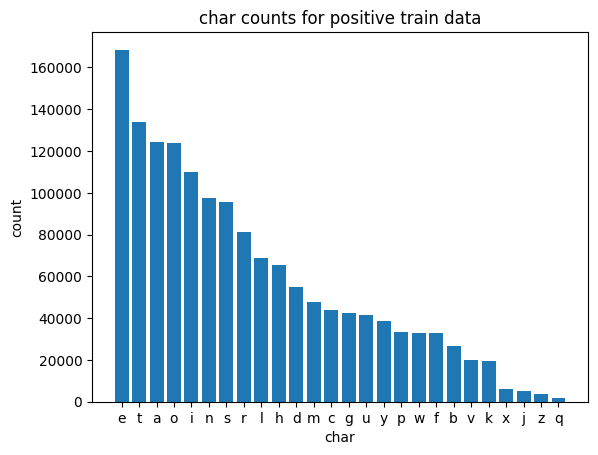

In [33]:
trainPosCount = countCharacters(x_train_pos)
trainPosCountSorted = dict(sorted(trainPosCount.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True))

plt.bar(trainPosCountSorted.keys(), trainPosCountSorted.values())
plt.title("char counts for positive train data")
plt.xlabel("char")
plt.ylabel("count")
plt.show()

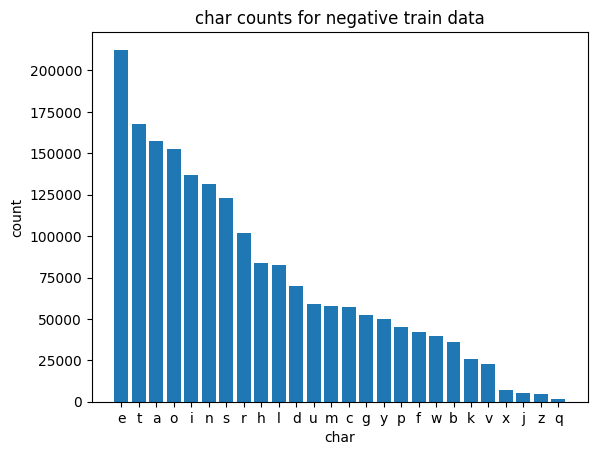

In [34]:
trainNegCount = countCharacters(x_train_neg)
trainNegCountSorted = dict(sorted(trainNegCount.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True))


plt.bar(trainNegCountSorted.keys(), trainNegCountSorted.values())
plt.title("char counts for negative train data")
plt.xlabel("char")
plt.ylabel("count")
plt.show()

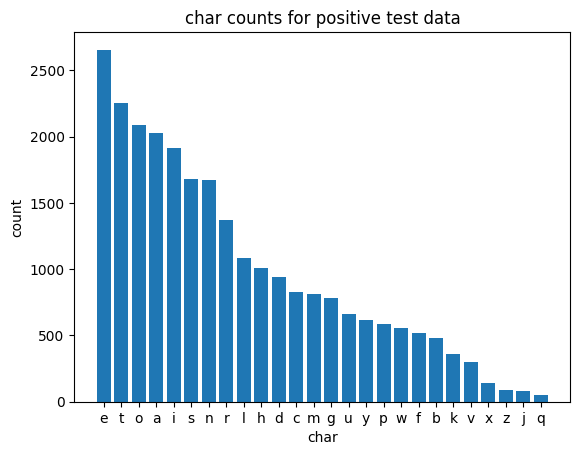

In [35]:
testPosCount = countCharacters(x_test_pos)
testPosCountSorted = dict(sorted(testPosCount.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True))


plt.bar(testPosCountSorted.keys(), testPosCountSorted.values())
plt.title("char counts for positive test data")
plt.xlabel("char")
plt.ylabel("count")
plt.show()

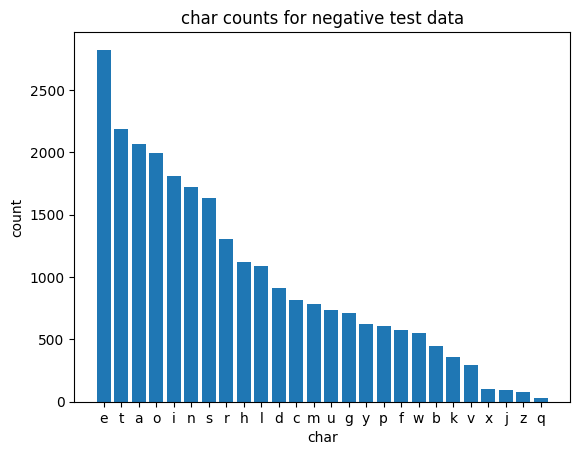

In [36]:
testNegCount = countCharacters(x_test_neg)
testNegCountSorted = dict(sorted(testNegCount.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True))


plt.bar(testNegCountSorted.keys(), testNegCountSorted.values())
plt.title("char counts for negative test data")
plt.xlabel("char")
plt.ylabel("count")
plt.show()

As you can see, regardless of class label or being test/train, the character frequencies are roughly the same. This means in this regard, we are working with similar data. 

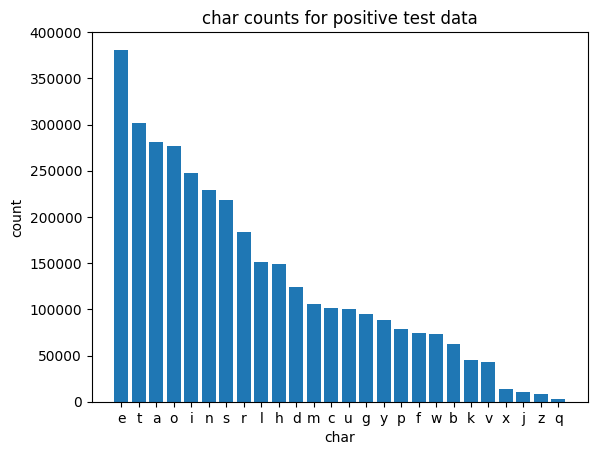

In [37]:
trainCount = countCharacters(x_train)
trainCountSorted = dict(sorted(trainCount.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True))


plt.bar(trainCountSorted.keys(), trainCountSorted.values())
plt.title("char counts for positive test data")
plt.xlabel("char")
plt.ylabel("count")
plt.show()

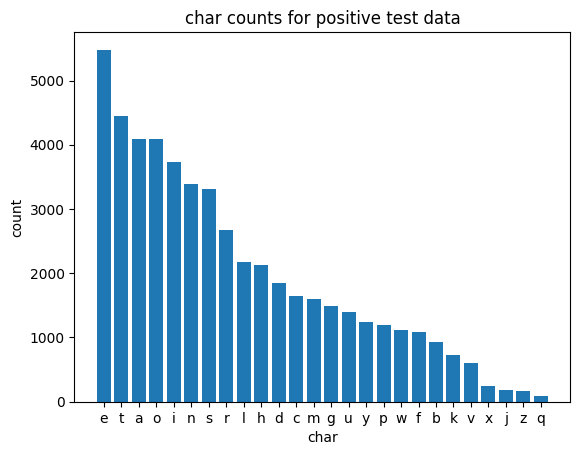

In [38]:
testCount = countCharacters(x_test)
testCountSorted = dict(sorted(testCount.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True))


plt.bar(testCountSorted.keys(), testCountSorted.values())
plt.title("char counts for positive test data")
plt.xlabel("char")
plt.ylabel("count")
plt.show()

Then, running the comparison on test versus traindata, and ignoring the class label once again produces very similar frequencies, so we can conclude our test data is a good test for both the train data and the english language, since these character frequencies are similar to actual english writing. 

## Word Length per Response:

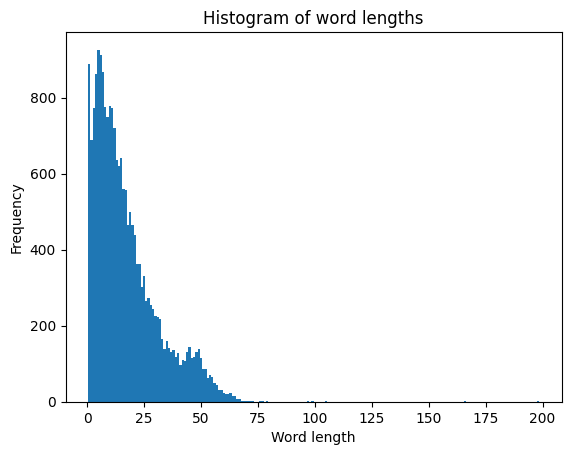

In [44]:
trainWordLengthPos = countWords(x_train_pos)
plt.hist(trainWordLengthPos, bins=range(min(trainWordLengthPos), max(trainWordLengthPos) + 2), align='left')
plt.xlabel('amount')
plt.ylabel('count')
plt.title('amount of words for positive train responses')
plt.show()

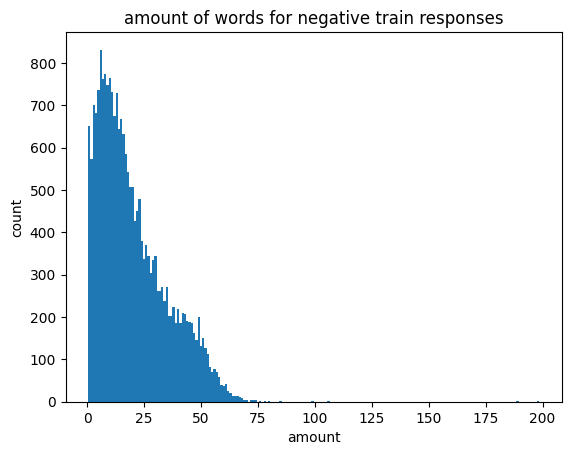

In [45]:
trainWordLengthNeg = countWords(x_train_neg)
plt.hist(trainWordLengthNeg, bins=range(min(trainWordLengthNeg), max(trainWordLengthNeg) + 2), align='left')
plt.xlabel('amount')
plt.ylabel('count')
plt.title('amount of words for negative train responses')
plt.show()

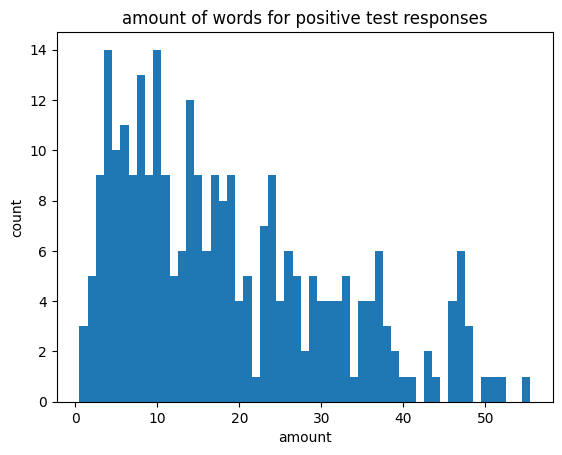

In [46]:
testnWordLengthPos = countWords(x_test_pos)
plt.hist(testnWordLengthPos, bins=range(min(testnWordLengthPos), max(testnWordLengthPos) + 2), align='left')
plt.xlabel('amount')
plt.ylabel('count')
plt.title('amount of words for positive test responses')
plt.show()

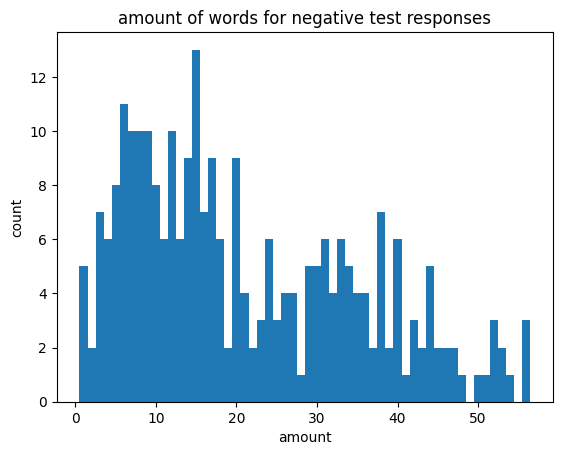

In [47]:
testWordLengthNeg = countWords(x_test_neg)
plt.hist(testWordLengthNeg, bins=range(min(testWordLengthNeg), max(testWordLengthNeg) + 2), align='left')
plt.xlabel('amount')
plt.ylabel('count')
plt.title('amount of words for negative test responses')
plt.show()

### analysis

As you can see, all 4 categories produce similar looking data, with a spike between 10 and 20, and most data being grouped together on the left. One interesting difference however is the test data doesn't have any responses longer than 50-something. This means that the test data doesn't have any long response tests to check the model on, and so the model may end up overfitting for those. Additioanlly, the spike at 1 for the train data is significantly larger than it is for the test data. This is fine however since this data isn't super valuable since it doesn't offer a lot to make a prediction from.

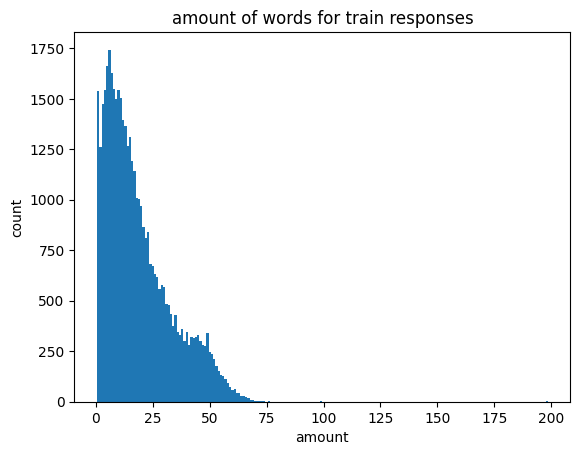

In [48]:
trainWordLength = countWords(x_train)
plt.hist(trainWordLength, bins=range(min(trainWordLength), max(trainWordLength) + 2), align='left')
plt.xlabel('amount')
plt.ylabel('count')
plt.title('amount of words for train responses')
plt.show()

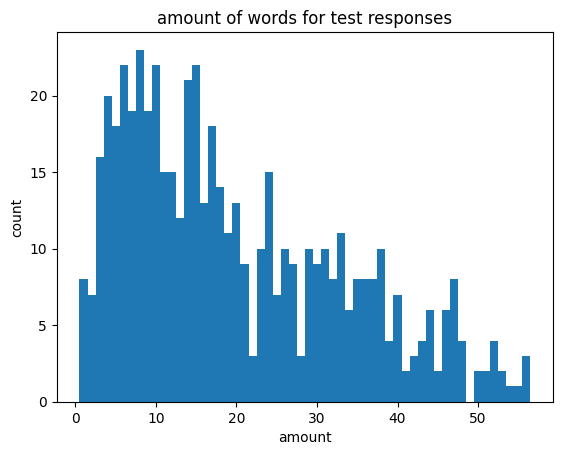

In [49]:
testWordLength = countWords(x_test)
plt.hist(testWordLength, bins=range(min(testWordLength), max(testWordLength) + 2), align='left')
plt.xlabel('amount')
plt.ylabel('count')
plt.title('amount of words for test responses')
plt.show()

### analysis

The same observations as made for the 4 groups can be made when only splitting the data by trian/test. However the spike for train data appears to be much larger than it is for the test data. This is fine however, since it is more important (in my opinion) to test on a good spread of lengths. However in this way, the test and train data don't perfectly match. 

## TDIDF

In [75]:
#runs tdidf, and prints the 10 most and least important words
def tdidf(data):
    vector = TfidfVectorizer()
    matrix = vector.fit_transform(data)
    terms = np.array(matrix.mean(axis=0).argsort()[::-1])


    strr = "The 10 least important terms: "
    for i in range(10):
        strr += vector.get_feature_names_out()[terms[0][i]] + " "
    print(strr)
    
    strr = "The 10 most important terms:"
    for i in range(1, 11):
        strr += vector.get_feature_names_out()[terms[0][-i]] + " "
    print(strr)

In [77]:
print("tdidf on positive train data")
print("==============================")
tdidf(x_train_pos)
print("==============================")
print("tdidf on negative train data")
print("==============================")
tdidf(x_train_neg)
print("==============================")
print("tdidf on positive test data")
print("==============================")
tdidf(x_test_pos)
print("==============================")
print("tdidf on negative test data")
print("==============================")
tdidf(x_test_neg)
print("==============================")
print("tdidf on all train data")
print("==============================")
tdidf(x_train)
print("==============================")
print("tdidf on all test data")
print("==============================")
tdidf(x_test)

tdidf on positive train data
The 10 least important terms: lmepa yass fuction maint strictly alcohol boat 1070 caution boris 
The 10 most important terms:the to and it this is of for in my 
tdidf on negative train data
The 10 least important terms: germany ай actick stoling acceived actictical sara mary elena sheila 
The 10 most important terms:the to is and it this of you in my 
tdidf on positive test data
The 10 least important terms: pm investors jnj estimates et johnso rose johnsonandjohnson i61bk0gdrh hike 
The 10 most important terms:the to this and is of com it twitter pic 
tdidf on negative test data
The 10 least important terms: 69 content recycled 65 ps4 gamespot xone technical playstati normal 
The 10 most important terms:the is to and this it you of my game 
tdidf on all train data
The 10 least important terms: lmepa yass actick stoling acceived actictical elena sara mary 1070 
The 10 most important terms:the to and is it this of you in for 
tdidf on all test data
The 10 le

### analysis

As you can see, the most important terms among all the data sets is relatively the same, and is usually common words in the english language, as well as import words to the platform itself such as com, twitter, pic and game. Meanwhile, the least important words tend to vary pretty heavily, which is to be expected since it is unlikely that those words occur more than once, and therefore there wont be much overlap.

## summary

As you can see, our dataset is relatively balanced, and functions pretty similar to the english language. This means we can apply a model that is used for more general sentiment analysis to this task, since the text will behave somewhat similar. Additionally, since the data is pretty similar, regardless of being postiive or negative, this means it makes sense to use a more complex model, since identifying a positive versus negative sentiment post isn't as easy as searching for certain character prevalence or a certain word. 